#  Seulasten etäisyys ja ikä

*Muokattu Deborah Baines'in laatimasta python-harjoituksesta*

Tässä tehtävässä haetaan avoimeen tähtijoukkoon Seulaset (Plejadit, Messier 45) kuuluvat tähdet Gaia-arkistosta sekä arvoidaan joukon etäisyys ja ikä.  

Lataa ensin tarvittavat python-modulit:

In [1]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import colors

# Estä varoitukset. Lisää eteen #, jos haluat nähdä ne.
import warnings
warnings.filterwarnings('ignore')

Lataa Gaia-arkiston taulukot:

In [3]:
tables = Gaia.load_tables(only_names=True)
#for table in (tables):
#    print (table.get_qualified_name())

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


Hae tähdet Seulasten näennäisen keskipisteen (R.A. 56.75, Dec. +24.1167) ympäristöstä 3 asteen säteellä. 

Ota mukaan vain ne, joiden ominaisliikkeiden (pmra, pmdec) ja parallaksin (parallax) suhteelliset virheet ovat pienempiä kuin 10%. 

Vaadi lisäksi, että parametrit perustuvat vähintään viiteen havaintokertaan (visibility_periods_used) ja että RUWE-parametri (Re-normalized Unit Weight Error) on korkeintaan 1.4. Tällaisen arvon uskotaan osoittavan, että tähdelle johdetut  astrometriset parametrit ovat luotettavia, ja että se todennäkösesti on yksinkertainen tähti ko. havaintotarkkuudella. 

In [4]:
job0 = Gaia.launch_job_async("SELECT * \
FROM gaiadr3.gaia_source \
WHERE CONTAINS(POINT('ICRS',gaiadr3.gaia_source.ra,gaiadr3.gaia_source.dec),\
CIRCLE('ICRS',56.75,24.1167,3))=1 \
AND abs(pmra_error/pmra)<0.10 \
AND abs(pmdec_error/pmdec)<0.10 \
AND pmra IS NOT NULL AND abs(pmra)>0 \
AND pmdec IS NOT NULL AND abs(pmdec)>0 \
AND visibility_periods_used >=5 \
AND (parallax_error/parallax)<0.1 \
AND RUWE<=1.4;", dump_to_file=False) 

INFO: Query finished. [astroquery.utils.tap.core]


Tarkastellaan valittua taulukkoa ja sen kokoa. Käytä valitulle otokselle esim. nimeä "r": 

In [5]:
r = job0.get_results()
print (r['source_id', 'ra','dec'])

    source_id             ra                dec        
                         deg                deg        
----------------- ------------------ ------------------
64161038966959744  57.58351516512873  22.94404512965766
63488687606258688  56.49400035190123 21.128644697701073
63488829341345024  56.44691798971596 21.134173914278485
63488966780294912 56.465349861263846 21.150816821960543
63489001140030464  56.47860559405783 21.166784845210422
63489722694541056  56.41197797077351 21.164647183966157
              ...                ...                ...
53294776005118464 59.164161564830884 22.099230518469444
53295463197329920  59.22263362544457  22.16272991238701
51781985444184832  58.83012228061413 21.808890921958568
51782569559723904 58.877768074045996 21.855197138139566
51789132270006784  58.95943474283153 21.919262181391773
51789166629740672 58.970214421165394 21.936820094670242
51790644098490368  58.97817439402003  21.94683424572576
Length = 32752 rows


Tähtijoukot erottuvat taustan ja etualan tähdistä ominaisliikkeen perusteella. 

Piirrä haettujen tähtien ominaisliikkeiden jakauma (pmra ja pmdec) käyttäen rajoina pmra: [-30,50] ja pmdec: [-60,-20] mas/yr:

*Seulaset erottuvat selvästi kuvan alaosassa ominaisliikkeiden pmra ~ 20 mas/yr, pmdec -45 mas/yr tienoilla.* 

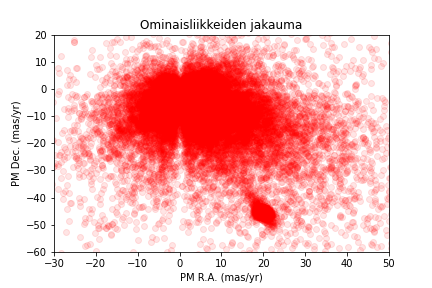

In [51]:
%matplotlib widget
plt.scatter(r['pmra'], r['pmdec'], color='r', alpha=0.1, label='Kaikki')
plt.xlabel('PM R.A. (mas/yr)')
plt.ylabel('PM Dec. (mas/yr)')
plt.title('Ominaisliikkeiden jakauma')
plt.xlim(-30,50)
plt.ylim(-60,20)

plt.show()

Tehtävä 1. Määrää kuvasta ominaisliikealue, johon Seulasiin kuuluvat tähdet todennäköisesti kuuluvat.  Zoomaa alaosassa näkyvään tihentymään käyttämällä työkalupalkin nelikulmiota.

Tehtävä 2. Tee uusi haku lisäämällä edellisen komennon hakuehtoihin R.A. ja Dec. suuntaisten ominaisliikkeiden rajat. Tämä tapahtuu lisäämällä ehdot "pmra BETWEEN x1 AND x2" ja "pmdec BETWEEN y1 AND y2". Kopioi ensin "job0" alle, ja anna tälle esim. nimi "job1".   

In [45]:
job1 = Gaia.launch_job_async("SELECT * \
FROM gaiadr3.gaia_source \
WHERE CONTAINS(POINT('ICRS',gaiadr3.gaia_source.ra,gaiadr3.gaia_source.dec),\
CIRCLE('ICRS',56.75,24.1167,3))=1 \
AND abs(pmra_error/pmra)<0.10 \
AND abs(pmdec_error/pmdec)<0.10 \
AND pmra IS NOT NULL AND abs(pmra)>0 \
AND pmdec IS NOT NULL AND abs(pmdec)>0 \
AND pmra BETWEEN 18 AND 22 \
AND pmdec BETWEEN -48 AND -42 \
AND visibility_periods_used >=5 \
AND (parallax_error/parallax)<0.1 \
AND RUWE<=1.4;", dump_to_file=False)

INFO: Query finished. [astroquery.utils.tap.core]


Anna näin valitulle otokselle uusi nimi, esim. "j". Tarkastele sen kokoa:

In [46]:
j = job1.get_results() 
print (j['ra','dec','parallax'])

        ra                dec              parallax     
       deg                deg                mas        
------------------ ------------------ ------------------
56.383382651277834 21.246480352393984 7.7480712178475075
 56.29806820079618 21.241338325221804   7.30186058491228
 56.53254973940973 21.345158750529677  7.234548479116474
 58.26896651993362 22.801152586524747  7.293432572419531
 58.31550471151817 22.870486617226987  7.730450865699229
58.256848955762266  22.97990043814057  7.420786200411975
               ...                ...                ...
 57.17979485408404 26.539025300249094  7.610695564329927
57.051972156311926  26.58360374254647  7.582671190496229
 56.99008522853177 26.629052685627993   7.56666014095888
 57.08124849197461  26.64967318022078  6.831768127963201
 57.31748195200527  26.81736178542863  7.402503911495125
57.409403943429396 26.851435079305364  7.310328046118832
57.526829832795514  26.97174736066095  7.469647336402018
Length = 1019 rows


Plottaa, alkuperäinen otos "r" ja ominaisliikkeiden perusteella valittu otos "j" samaan kuvaan. Katso mallia kohdasta 6. Käytä eri väriä j-otoksen tähdille, esim. "plt.scatter(j['pmra'], j['pmdec'], color='b', alpha=0.1,label='Seulaset')". Staattisen kuvan saat komennolla "%matplotlib inline". 

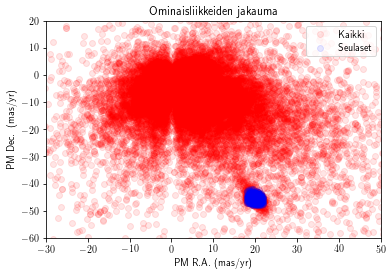

In [80]:
%matplotlib inline
plt.scatter(r['pmra'], r['pmdec'], color='r', alpha=0.1,label='Kaikki')
plt.scatter(j['pmra'], j['pmdec'], color='b', alpha=0.1,label='Seulaset')
plt.xlabel('PM R.A. (mas/yr)')
plt.ylabel('PM Dec. (mas/yr)')
plt.title('Ominaisliikkeiden jakauma')
plt.xlim(-30,50)
plt.ylim(-60,20)
plt.legend()


Alkuperäisen "r"-otoksen tähtien parallaksien jakauma voidaan esittää histogrammina seuraavasti:

Kaikki tähdet:  keskim. parallaksi  1.9 +- 2.1 mas


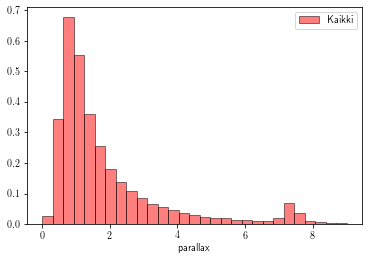

In [78]:
%matplotlib inline
bins=np.linspace(0.0,9.0,30)
plt.hist(r['parallax'],bins,density=True,histtype='bar',facecolor='r',edgecolor='k',alpha=0.5,label='Kaikki')
plt.legend(loc='upper right')
plt.xlabel('parallax')

avg_parallax = np.mean(r['parallax']) 
stddev_parallax = np.std(r['parallax']) 

print('Kaikki tähdet:  keskim. parallaksi ', ("%.1f" % avg_parallax), '+-', ("%.1f" % stddev_parallax), 'mas')
 
plt.show()

Tehtävä 3. Piirrä vastaava histogrammi ominaisliikkeiden perusteella valitulle otokselle. Laske samoin parallaksin keskiarvo ja standardipoikkeama. 

Seulaset:  keskim. parallaksi  7.3 +- 0.4 mas


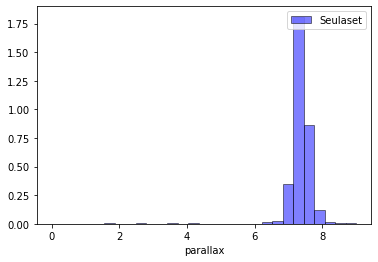

In [58]:
%matplotlib inline
bins=np.linspace(0.0,9.0,30)
plt.hist(j['parallax'],bins,density=True,histtype='bar',facecolor='b',edgecolor='k',alpha=0.5,label='Seulaset')
plt.legend(loc='upper right')
plt.xlabel('parallax')

avg_parallax = np.mean(j['parallax']) 
stddev_parallax = np.std(j['parallax']) 

print('Seulaset:  keskim. parallaksi ', ("%.1f" % avg_parallax), '+-', ("%.1f" % stddev_parallax), 'mas')
      
      
plt.show()

Tehtävä 4. Piirrä myös etäisyyksien histogrammi sekä laske keskimääräinen etäisyys ja sen standardipoikkeama ominaisliikkeiden perusteella valituille tähdille.

Etäisyys parsekeissa on parallaksin käänteisluku. Koska Gaian parallaksi on annettu millikaarisekunneissa, sen käänteisluku antaa etäisyyden kiloparsekeissa. Määrittele siis esim. muuttuja "distance=1000.0/j['parallax']".

Apua etäisyyden standardipoikkeamaan: Kun y=1/x, dy = dx/x^2.

Seulaset:  keskim. etäisyys  136.1 +- 8.0 pc


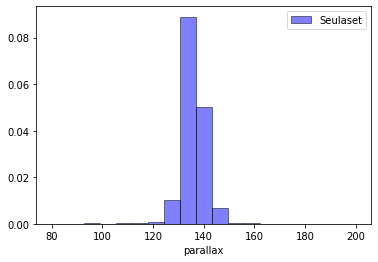

In [59]:
%matplotlib inline
distance=1000.0/j['parallax']
bins=np.linspace(80.0,200.0,20)

plt.hist(distance,bins,density=True,histtype='bar',facecolor='b',edgecolor='k',alpha=0.5,label='Seulaset')
plt.legend(loc='upper right')
plt.xlabel('parallax')
avg_distance=1000.0/avg_parallax
stddev_distance=1000.0/(avg_parallax**2)*stddev_parallax
print('Seulaset:  keskim. etäisyys ', ("%.1f" % avg_distance), '+-', ("%.1f" % stddev_distance), 'pc')

plt.show()

Piirrä valittujen tähtien jakauma taivaalla.

Oheisessa kuvassa alkuperäisen otoksen tähtitiheys on esitetty pikselikarttana ja ominaisliikkeiden perusteella Seulasiin todennäköisesti kuuluvat tähdet on esitetty punaisina pisteinä.


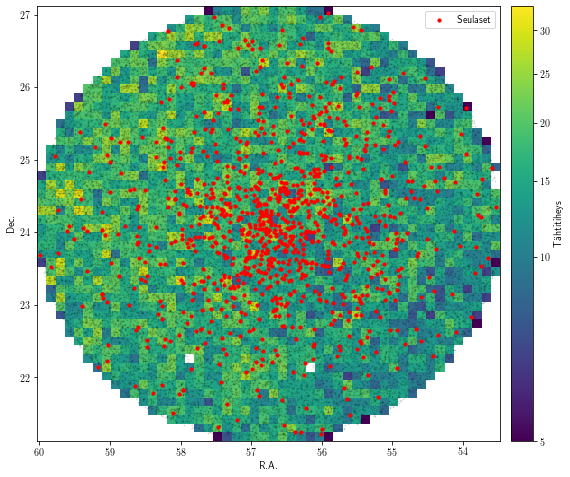

In [77]:
ra=r['ra'].data
dec=r['dec'].data
ra0,dec0=[56.75,24.1167]  # M45
c0=SkyCoord(ra0,dec0,unit='deg',frame='icrs')

jra=j['ra'].data
jdec=j['dec'].data

plt.rc('text', usetex=True)

fig, ax = plt.subplots(figsize=(10, 8))
h = ax.hist2d(ra, dec, bins=50, cmin=5, norm=colors.PowerNorm(0.5), zorder=0.5)

ax.scatter(ra, dec, alpha=0.1, s=1, color='k', zorder=0.5)
ax.invert_xaxis()
cb = fig.colorbar(h[3], ax=ax, pad=0.02)
ax.set_xlabel(r'R.A.')
ax.set_ylabel(r'Dec.')
cb.set_label(r'Tähtitiheys')

ax.scatter(jra, jdec, color='r', s=10,zorder=1,label='Seulaset')
plt.legend(loc='upper right')

plt.show()


Tehtävä 5. Piirrä Seulasten väri-magnitudi-diagrammi G vs. GB-GR. Tällöin siis x-akselilla on väri GB-GR, joka saadaan taulukosta kirjoittamalla j['phot_bp_mean_mag']-j['phot_rp_mean_mag'] (kun otoksesi nimi on "j"), ja y-akselilla on näennäinen G-magnitudi j['phot_g_mean_mag']. xy-plotti saadaan aikaan komennolla plt.scatter(x,y).

Valitse y-akselin rajat magnitudikonvention mukaisesti niin, että pienet arvot ovat ylhäällä (plt.ylim(max,min)). Jätä pois 20 magnitudia heikommat tähdet, niin että alarajana on 20.

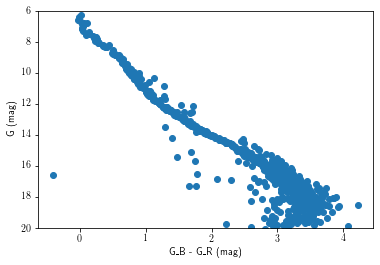

In [81]:
plt.scatter(j['phot_bp_mean_mag']-j['phot_rp_mean_mag'],j['phot_g_mean_mag'])
plt.xlabel('G_B - G_R (mag)')
plt.ylabel('G (mag)')
plt.ylim(20,6)
plt.show()

Lue tähtimalleihin perustuvat väri-magnitudi-diagrammat (CMD) eri-ikäisille tähtipopulaatioille. Tiedot on haettu CMD -tähtimallipalvelusta (http://stev.oapd.inaf.it). Isokroonitaulukot cmd_10myr.dat, cmd_100myr.dat, cmd_300myr.dat ja cmd_1gyr.dat vastaavat 10, 100, 300 ja 1000 miljoonan vuoden ikäisiä tähtipopulaatioita. Absoluuttiset magnitudit on annettu suoraan Gaian G-, GP-, ja GR-suodattimille. Taulukot sisältävät paljon muutakin tietoa, kuten massat,luminositeetit ja efektiiviset lämpötilat, mutta tarvitsemme tässä vain magnitudeja, jotka löytyvät sarakkeista 28-30. 

In [71]:
filenames=['cmd_10myr.dat','cmd_100myr.dat','cmd_300myr.dat','cmd_1gyr.dat']

gm=[]   # Gaian G-magnitudi
bm=[]   # Gaian GB-magnitudi
rm=[]   # Gaian GR-magnitudi


for i in filenames:
    table = open('%s' % i).readlines()
    gmag=[]
    bpmag=[]
    rpmag=[]
    
    for line in table:
        line = line.split('#')[0]
        line = line.rstrip()
        s = line.split()
        if len(s) < 2: continue
        gmag.append(float(s[28]))
        bpmag.append(float(s[29]))
        rpmag.append(float(s[30]))
    
    gm.append(gmag)
    bm.append(bpmag)
    rm.append(rpmag)

Piirrä teoreettinen väri-magnitudi-diagrammi ylläluettujen taulukkomuuttujien avulla.

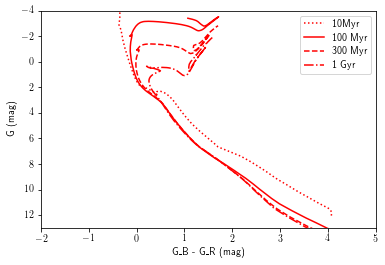

In [82]:
lines=['dotted','solid','dashed','dashdot']
linelabels=['10Myr','100 Myr', '300 Myr','1 Gyr']

for k in range(4):

     x=np.array(bm[k:k+1])-np.array(rm[k:k+1])

     y=np.array(gm[k:k+1])

     plt.plot(x[0][0:200],y[0][0:200],color='r',linestyle=lines[k],label=linelabels[k])
        
plt.ylim(13,-4)

plt.xlim(-2,5)
plt.xlabel('G_B - G_R (mag)')
plt.ylabel('G (mag)')

plt.legend()


Tehtävä 6. Piirrä väri-magnitudi-diagrammi kuten tehtävässä 5, mutta käytä y-muuttujana absoluuttista G-magnitudia. Tämä saadaan vähentämällä G-magnitudista etäisyysmoduli, m-M = 5 lg(d/10 pc). 

Käytännössä, jos otoksen keskimääräinen parallaksi on p=np.mean(j['parallax']), etäisyysmoduli on dm=5.0*np.log(100.0/p)/np.log(10.0), missä log on luonnollinen logaritmi. 

Piirrä samaan kuvaan teoreettiset isokroonit 10, 100, 300 ja 1000 miljoonan vuoden ikäisille tähtipopulaatioille kuten yllä. 


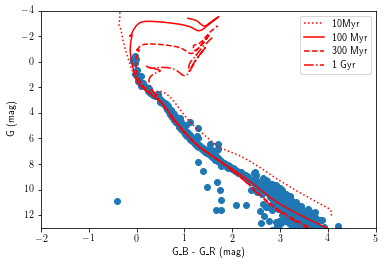

In [83]:
p=np.mean(j['parallax'])
dm=5.0*np.log(100.0/p)/np.log(10.0)

plt.scatter(j['phot_bp_mean_mag']-j['phot_rp_mean_mag'],j['phot_g_mean_mag']-dm)

lines=['dotted','solid','dashed','dashdot']

for k in range(4):

    x=np.array(bm[k:k+1])-np.array(rm[k:k+1])

    y=np.array(gm[k:k+1])

    plt.plot(x[0][0:200],y[0][0:200],color='r',linestyle=lines[k],label=linelabels[k])

plt.ylim(13,-4)

plt.xlim(-2,5)
plt.xlabel('G_B - G_R (mag)')
plt.ylabel('G (mag)')


plt.legend()

Minkä-ikäisestä tähtijoukosta on suurinpiirtein kysymys? 

Nyt voisimme rajata otosta edelleen väri-magnitudi-diagramman avulla, karsimalla selvästi pääsarjan ala- ja yläpuolella sijaitsevat tähdet. Myös parallaksia ja sen keskihajontaa voitaisiin käyttää poistamaan joukkoon kuulumattomia.  Uuden otoksen avulla voitaisiin sitten johtaa tarkemmat arviot joukon keskimääräisille astrometrisille parametreille ja iälle.   